In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

In [22]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Seoul_Only.csv")

In [23]:
df = df.iloc[:, 2:]
display(df)

kaptCode     bjdCode  Household_Num  Begin_Date Heating_Method  \
0     A13203302  1132010500          407.0  20020726.0           개별난방   
1     A13203303  1132010500          824.0  19861202.0           개별난방   
2     A13295201  1132010500          155.0  20061226.0           개별난방   
3     A13286107  1132010500          582.0  20020326.0           개별난방   
4     A13287801  1132010500          287.0  19950609.0           개별난방   
...         ...         ...            ...         ...            ...   
2623  A13681701  1129013900          315.0  19940624.0           개별난방   
2624  A13676101  1129013900          580.0  20090626.0           개별난방   
2625  A13676102  1129013900           80.0  20090626.0           개별난방   
2626  A13615002  1129013900          453.0  19990612.0           개별난방   
2627  A10025283  1129013900         1091.0  20190228.0           개별난방   

     House_Type Elec_Con  Elev_Num  Park_Above  Park_Below  
0           아파트     단일계약      15.0       116.0       346.0  
1           아파트     단일계약      16.0       600.0         0.0  
2           아파트     단일계약       6.0        23.0       146.0  
3           아파트     단일계약      22.0       281.0       148.0  
4           아파트     단일계약      13.0       198.0        23.0  
...         ...      ...       ...         ...         ...  
2623        아파트     단일계약       7.0        62.0       179.0  
2624        아파트     종합계약      19.0         0.0       684.0  
2625        아파트     단일계약       2.0         0.0        56.0  
2626        아파트     단일계약      10.0       104.0       357.0  
2627        아파트     종합계약      32.0         3.0      1305.0  

[2628 rows x 10 columns]

In [20]:
df.isnull().sum()

kaptCode           0
bjdCode            0
Household_Num      1
Begin_Date         5
Heating_Method     4
House_Type         0
Elec_Con          74
Elev_Num          93
Park_Above        68
Park_Below        69
dtype: int64

<AxesSubplot: >

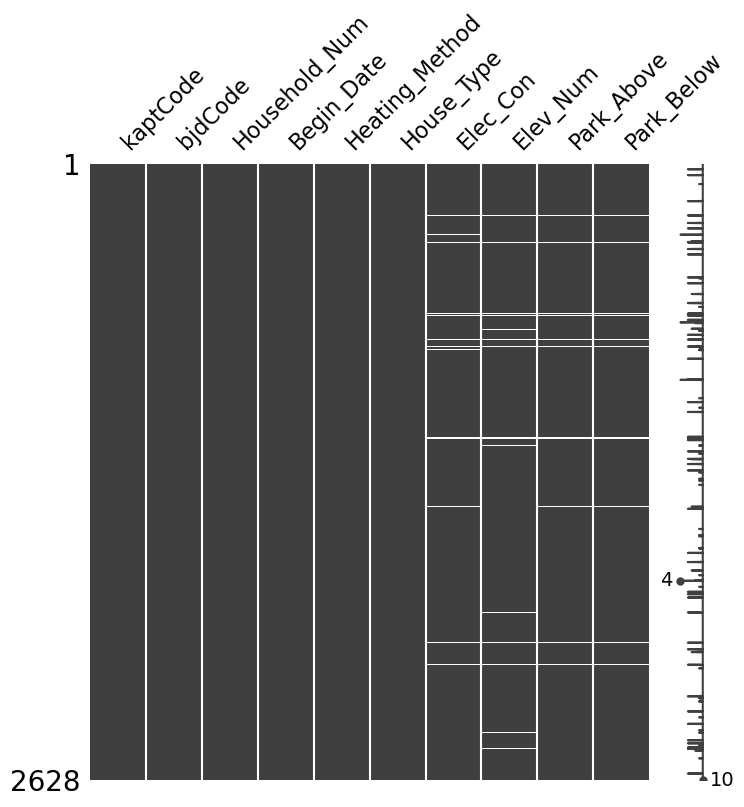

In [21]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [36]:
# 5 null values
np.where(df['Begin_Date'].isnull())[0]

array([ 301,  675,  920, 1777, 2292], dtype=int64)

In [67]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0      2002-07-26
1      1986-12-02
2      2006-12-26
3      2002-03-26
4      1995-06-09
          ...    
2623   1994-06-24
2624   2009-06-26
2625   2009-06-26
2626   1999-06-12
2627   2019-02-28
Name: Begin_Date, Length: 2623, dtype: datetime64[ns]


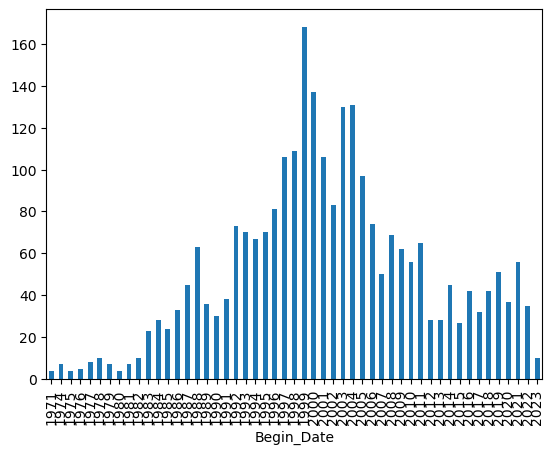

In [66]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

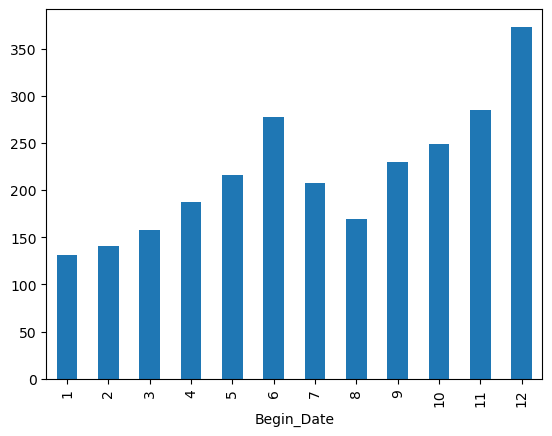

In [68]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [69]:
#1 null value
Household_Num = df['Household_Num']
print(np.where(Household_Num.isnull())[0])
display(Household_Num)

[2501]


0        407.0
1        824.0
2        155.0
3        582.0
4        287.0
         ...  
2623     315.0
2624     580.0
2625      80.0
2626     453.0
2627    1091.0
Name: Household_Num, Length: 2628, dtype: float64

In [71]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

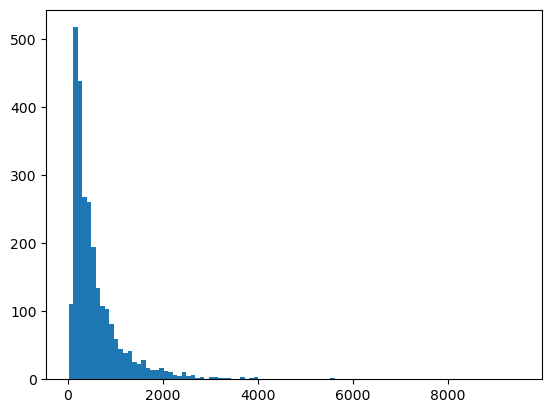

In [75]:
fig, ax = plt.subplots()
ax.hist(Household_Num, bins = 100)
plt.show()

In [77]:
Household_Num.describe()

count    2627.000000
mean      592.995051
std       640.433964
min        19.000000
25%       213.000000
50%       391.000000
75%       718.500000
max      9510.000000
Name: Household_Num, dtype: float64

In [90]:
find = np.where(Household_Num == Household_Num.max())[0]
df.iloc[find[0]]


kaptCode           A10025850
bjdCode           1171010700
Household_Num         9510.0
Begin_Date        20181228.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num               384.0
Park_Above               0.0
Park_Below           12096.0
Name: 2100, dtype: object

## Heating_Method

In [96]:
# 4 null values
Heating_Method = df['Heating_Method']
print(np.where(Heating_Method.isnull())[0])
display(Heating_Method)

[ 301  675  920 1777]


0       개별난방
1       개별난방
2       개별난방
3       개별난방
4       개별난방
        ... 
2623    개별난방
2624    개별난방
2625    개별난방
2626    개별난방
2627    개별난방
Name: Heating_Method, Length: 2628, dtype: object

In [97]:
Heating_Method = Heating_Method.dropna()

In [98]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 ... 0 0 0]
Index(['개별난방', '지역난방', '중앙난방', '개별난방+기타', '기타'], dtype='object')


In [103]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    1814
1     686
2     109
3      13
4       2
dtype: int64

In [106]:
eng_ind_HM = ['Individual', 'Regional', 'Central', 'Indiv + Other', 'Other']

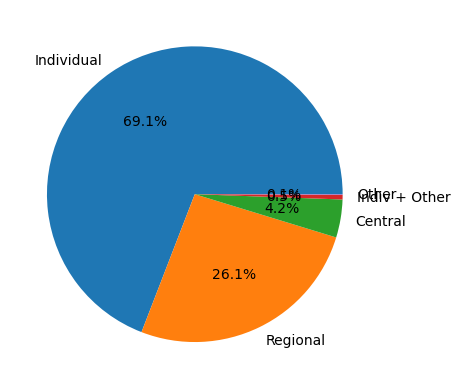

In [107]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()